# MA5790 - Assignment 8 - MM15B022 - R Mythreyi

In [2]:
%load_ext tikzmagic

The tikzmagic module is not an IPython extension.


In [1]:
%matplotlib inline

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

## Question 1

Derivation of Runge-Kutta Methods

### Solution - RK2

### Derivation

Given:
$$
y_{n+1}=y_{n}+\gamma_{1} k_{1}+\gamma_{2} k_{2}
$$
and
$$
k_{1}=h f\left(t_{n}, t_{n}\right) \\
k_{2}=h f\left(y_{n}+\beta k_{1}, t_{n}+\alpha h\right)
$$

We can use Taylor Series expansion for two variables to write $k_2$ differently.
Taylor Expansion goes as:
$$
g(x+r, y+s)=g(x, y)+r \frac{\partial g}{\partial x}+s \frac{\partial g}{\partial y}+\cdots
$$
Therefore, 
$$
k_{2}=h f\left(y_{n}+\beta k_{1}, t_{n}+\alpha h\right) = hf\left(y_{n}, t_{n}\right) + h\beta k_1f\left(y_{n}, t_{n}\right) \frac{\partial f}{\partial y} \left(y_{n}, t_{n}\right) + \alpha h^2 \frac{\partial f}{\partial t} \left(y_{n}, t_{n}\right) + O\left(h^{3}\right)
$$

This means, 
$$
y_{n+1}=y_{n}+\left[\gamma_{1}+\gamma_{2} \right] h f\left(y_{n}, t_{n}\right) +\left[ \alpha \frac{\partial f}{\partial t}+ \beta f\left(x_{n}, y_{n}\right) \frac{\partial f}{\partial y}\right] h^{2} \gamma_{2}+O\left(h^{3}\right)
$$

Comparing this with the Taylor Expansion for $y_{n+1}$ and using $\frac{d y}{d t} = f$:
$$
y_{n+1}=y_{n}+f\left(y_{n},t_{n}\right) h+\left(\frac{\partial f}{\partial t}+ f\frac{\partial f}{\partial y}\right) \frac{h^{2}}{2 !} + O\left(h^{3}\right)
$$
we get:

$$
\gamma_1 + \gamma_2 = 1 \\
\gamma_2 \alpha = \frac{1}{2} \\
\gamma_2 \beta = \frac{1}{2}
$$

The values are not unique, but the classic values taken are:
$$
\gamma_1 = \gamma_2 = \frac{1}{2} \\
\alpha = \beta = 1
$$

### Stability of RK2

Taking the above values for the coefficients, we get:
$$
y_{n+1}=y_{n}+0.5 h f+0.5 h f\left(y_{n}+h f, t_{n}+h\right)
$$
But, from the ODE, 
$$
y = \exp({\lambda t})
$$
Therefore,
$$
y_{n+1}=y_{n}\left[1+ \lambda h + \frac{(\lambda h)^2}{2} \right]
$$
The growth function is $1+ \lambda h + \frac{(\lambda h)^2}{2}$

### Solution - RK4

$$
y_{n+1}=y_{n}+h \sum_{i=1}^{4} \gamma_{i} k_{i}\\
k_{1} =f\left(t_{n}, t_{n}\right) \\ 
k_{2} =f\left(y_{n}+\beta_{21} k_{1}, t_{n}+\alpha_{1} h\right) \\ 
k_{3} =f\left(y_{n}+\beta_{31} k_{1}+\beta_{32} k_{2}, t_{n}+\alpha_{2} h\right) \\ 
k_{4} =f\left(y_{n}+\beta_{41} k_{1}+\beta_{42} k_{2}+\beta_{43} k_{3}, t_{n}+\alpha_{3} h\right)
$$

Taylor Expansion up to 5th order
$$
y(t+h)=y(t)+h y^{\prime}(t)+\frac{h^{2}}{2} y^{\prime \prime}(t)+\frac{h^{3}}{3 !} y^{\prime \prime \prime}(t)+\frac{h^{4}}{4 !} y^{(4)}(t)+O\left(h^{5}\right)
$$
where,
$$
y^{\prime}(t)=\frac{d y}{d t}=f \\
y^{\prime \prime}(t)=\frac{d^{2} y}{d t^{2}}=f_{t}+f_{y} f \\
y^{\prime \prime \prime}(t)=\frac{d^{3} y}{d t^{3}}=f_{t t}+2 f_{t y} f+f_{y y} f^{2}+f_{y} f_{t}+f_{y}^{2} f \\
y^{(4)}=\frac{d^{4} y}{d t^{4}} = y(t)+h f+\frac{h^{2}}{2 !}\left(f_{t}+f_{y} f\right)+\frac{h^{3}}{3 !}\left(f_{t t}+2 f_{t y} f+f_{y y} f^{2}\right)+\frac{h^{3}}{3 !} f_{y}\left(f_{t}+f_{y} f\right)+\frac{h^{4}}{4 !}\left(f_{t t t}+3 f_{t t y} f+3 f_{t y y} f^{2}+f_{y y y} f^{3}\right) +\frac{h^{4}}{24} f_{y}\left(f_{t t}+2 f_{t y} f+f_{y y} f^{2}\right)+\frac{h^{4}}{8}\left(f_{t}+f_{y} f\right)\left(f_{t y}+f_{y y} f\right)+\frac{h^{4}}{24}\left(f_{t}+f_{y} f\right) f_{y}^{2}+O\left(h^{5}\right)
$$
Here,
$$
f_{t}=\frac{\partial f}{\partial t}, f_{y}=\frac{\partial f}{\partial y}, f_{t t}=\frac{\partial^{2} f}{\partial t^{2}}, f_{t y}=\frac{\partial^{2} f}{\partial t \partial y},f_{y y}=\frac{\partial^{2} f}{\partial y^{2}}, \cdots
$$

Substituting all this in the Taylor Expansion, we get:
$$
y(t+h) = y(t)+h f+\frac{h^{2}}{2 !}\left(f_{t}+f_{y} f\right)+\frac{h^{3}}{3 !}\left(f_{t t}+2 f_{t y} f+f_{y y} f^{2}+f_{y} f_{t}+f_{y}^{2} f\right)+\frac{h^{4}}{4 !}\left(f_{t t t}+3 f_{t t y} f+3 f_{t y y} f^{2}+f_{y y y} f^{3}\right) +\frac{h^{4}}{24} f_{y}\left(f_{t t}+2 f_{t y} f+f_{y y} f^{2}\right)+\frac{h^{4}}{8}\left(f_{t}+f_{y} f\right)\left(f_{t y}+f_{y y} f\right)+\frac{h^{4}}{24}\left(f_{t}+f_{y} f\right) f_{y}^{2}+O\left(h^{5}\right)
$$

We now need to expand $k_2, k_3, k_4$.
$$
k_2 = f+h \alpha_{1}\left(f_{t}+f_{y} f\right)+\frac{\left(h \alpha_{1}\right)^{2}}{2}\left(f_{t t}+2 f f_{t y}+f^{2} f_{y y}\right)+\frac{\left(h \alpha_{1}\right)^{3}}{3 !}\left(f_{t t t}+3 f f_{t t y}+3 f^{2} f_{t y y}+f^{3} f_{y y y}\right)+O\left(h^{4}\right) \\
$$

--------


$$
k_3 = f+\alpha_{2}\left(f_{t}+f_{y} f\right) h+\left(\beta_{32} \alpha_{1}\left(f_{t}+f_{y} f\right) f_{y}+\frac{1}{2} \alpha_{2}^{2}\left(f_{t t}+2 f f_{t y}+f^{2} f_{y y}\right)\right) h^{2} +\left(\frac{1}{2} \beta_{32} \alpha_{1}^{2}\left(f_{t t}+2 f f_{t y}+f^{2} f_{y y}\right) f_{y}+\alpha_{1} \alpha_{2} \beta_{32}\left(f_{t}+f_{y} f\right)\left(f_{t y}+f f_{y y}\right)\right) h^{3} +\frac{h^{3}}{3 !}\left(\alpha_{2}^{3}\left(f_{t t t}+3 f f_{t t y}+3 f^{2} f_{t y y}+f^{3} f_{y y y}\right)\right)+O\left(h^{4}\right) \\ \\
$$

---------
$$
k_4 = f+\alpha_{3}\left(f_{t}+f_{y} f\right) h+\left(\beta_{42} \alpha_{1}+\beta_{43} \alpha_{2}\right)\left(f_{t}+f_{y} f\right) f_{y} h^{2} +\left(\frac{1}{2}\left(\beta_{42} \alpha_{1}^{2}+\beta_{43} \alpha_{2}^{2}\right)\left(f_{t t}+2 f f_{t y}+f^{2} f_{y y}\right)+\beta_{43} \beta_{32} \alpha_{1}\left(f_{t}+f_{y} f\right) f_{y}\right) f_{y} h^{3} +\frac{h^{2}}{2} \alpha_{3}^{2}\left(f_{t t}+2 f f_{t y}+f^{2} f_{y y}\right)+\alpha_{3}\left(\beta_{42} \alpha_{1}+\beta_{43} \alpha_{2}\right)\left(f_{t}+f_{y} f\right)\left(f_{t y}+f_{y y} f\right) h^{3} +\frac{h^{3}}{3 !} s_{4}^{3}\left(f_{t t t}+3 f f_{t t y}+3 f^{2} f_{t y y}+f^{3} f_{y y y}\right)+O\left(h^{4}\right)
$$

Matching the equation substituting these $k$ values and the Taylor Expansion for $y$ obtained previously, we get the following constrainsts on the coefficients.
$$
\gamma_{1}+\gamma_{2}+\gamma_{3}+\gamma_{4}=1 \\
\gamma_{2} \alpha_{1}+\gamma_{3} \alpha_{2}+\gamma_{4} \alpha_{3}=1 / 2 \\
\gamma_{2} \alpha_{1}^{2}+\gamma_{3} \alpha_{2}^{2}+\gamma_{4} \alpha_{3}^{2}=1 / 3 \\
\gamma_{2} \alpha_{1}^{3}+\gamma_{3} \alpha_{2}^{3}+\gamma_{4} \alpha_{3}^{3}=1 / 4 \\
\gamma_{3} \beta_{332} \alpha_{1}+\gamma_{4} \beta_{342} \alpha_{1}+\gamma_{4} \beta_{343} \alpha_{2}=1 / 6 \\
\gamma_{3} \beta_{332} \alpha_{2} \alpha_{1}+\gamma_{4} \beta_{342} \alpha_{3} \alpha_{1}+\gamma_{4} \beta_{343} \alpha_{3} \alpha_{2}=1 / 8 \\
\gamma_{3} \beta_{332} \alpha_{1}^{2}+\gamma_{4} \beta_{342} \alpha_{1}^{2}+\gamma_{4} \beta_{343} \alpha_{2}^{2}=1 / 12 \\
\gamma_{4} \beta_{343} \beta_{332} \alpha_{1}=1 / 24
$$

Substituting the given values of coefficients, we get the rest of the coefficients to match the classic RK4 scheme:
$$
\gamma_1 = \gamma_4 = 1/6 \\
\gamma_2 = \gamma_3 = 1/3 \\
\alpha_1 = \alpha_2 = 1/2 \\
\alpha_3 = 1 \\
\beta_{21} = 1/2 \\
\beta_{31} = \beta_{41} = 0 \\
\beta_{32} = 1/2 \\
\beta_{42} = 0 \\
\beta_{43} = 1
$$

The growth function for classic RK4 is $1+ \lambda h +\frac{(\lambda h)^{2}}{2}+\frac{(\lambda h)^{3}}{6}+\frac{(\lambda h)^{4}}{24}$

## Question 2

Pendulum (Small Amplitudes)

### Solution

The differential equation to be solved:
$$
\frac{d^{2} \theta}{d t^{2}}+\frac{g}{\ell} \theta=0
$$
Since it's a second order ODE, we need to first convert it to a set of first order ODE. This is done by making the substitution $\frac{d \theta}{d t} = y$. Now, the equations become:
$$
\frac{d \theta}{d t} =  y \\
\frac{d y}{d t} = -\frac{g}{\ell} \theta
$$

Given $g=\ell$, and initial values of $\theta_0 = \frac{\pi}{4}$ and $\frac{d \theta}{d t}|_{t=0} = 0$, we can now solve these using different time-marching schemes. 

In [49]:
import numpy as np
import matplotlib.pyplot as plt;

# define the function
# set up the time steps and other variables
tlo = 0
thi = 10

# Just for plotting
t_range = np.arange(tlo,thi,0.001)
y_exact = np.cos(t_range)*np.pi/4

def fun2(t,y):
    # Second order ODE, reformulated, returning only dy's values
    func = -y;
    return func

In [50]:
# Euler Explicit
dt_ee = 0.3
t_range_ee = np.arange(tlo,thi,dt_ee)

npts_ee = len(t_range_ee)
dy_ee = np.zeros((npts_ee,1))
y_ee = np.zeros((npts_ee,1))

dy_ee[0] = 0; # initial value
y_ee[0] = np.pi/4; # initial value

for i in range(npts_ee-1):
    dy_ee[i+1] = dy_ee[i] + dt_ee*fun2(t_range_ee[i],y_ee[i])
    y_ee[i+1] = y_ee[i] + dt_ee*dy_ee[i+1]

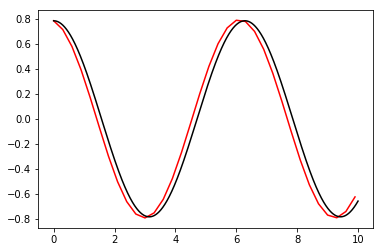

In [51]:
plt.plot(t_range_ee,y_ee,'r');
plt.plot(t_range,y_exact,'k');
plt.show();

In [52]:
# Euler Implicit
dt_ei = 0.3
t_range_ei = np.arange(tlo,thi,dt_ei)

npts_ei = len(t_range_ei)
dy_ei = np.zeros((npts_ei,1))
y_ei = np.zeros((npts_ei,1))

dy_ei[0] = 0; # initial value
y_ei[0] = np.pi/4; # initial value

for i in range(npts_ei-1):
    dy_ei[i+1] = dy_ei[i] + dt_ei*fun2(t_range_ei[i],y_ei[i])/(1+dt_ei**2)
    y_ei[i+1] = y_ei[i] + dt_ei*dy_ei[i+1]

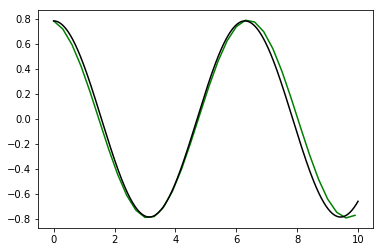

In [53]:
plt.plot(t_range_ei,y_ei,'g');
plt.plot(t_range,y_exact,'k');
plt.show();

In [54]:
# Trapezoidal
dt_tr = 0.3
t_range_tr = np.arange(tlo,thi,dt_tr)

npts_tr = len(t_range_tr)
dy_tr = np.zeros((npts_tr,1))
y_tr = np.zeros((npts_tr,1))

dy_tr[0] = 0; # initial value
y_tr[0] = np.pi/4; # initial value

for i in range(npts_tr-1):
    # we can directly using values computed above
    # dy_tr[i+1] = (dy_tr[i]*(1-0.25*dt_tr**2) + dt_tr*fun2(t_range_tr[i],y_tr[i]))/(1+0.25*dt_tr**2)
    y_tr[i+1] = 0.5*(y_ee[i+1] + y_ei[i+1]) 

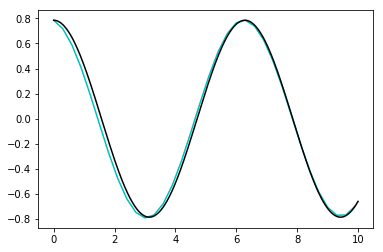

In [55]:
plt.plot(t_range_tr,y_tr,'c');
plt.plot(t_range,y_exact,'k');
plt.show();

In [56]:
# RK-2
dt_rk2 = 0.3
t_range_rk2 = np.arange(tlo,thi,dt_rk2)

npts_rk2 = len(t_range_rk2)
dy_rk2 = np.zeros((npts_rk2,1))
y_rk2 = np.zeros((npts_rk2,1))

dy_rk2[0] = 0; # initial value
y_rk2[0] = np.pi/4; # initial value

for i in range(npts_rk2-1):
    k1 = dt_rk2*fun2(t_range_rk2[i],y_rk2[i])
    k2 = dt_rk2*fun2(t_range_rk2[i]+dt_rk2,y_rk2[i]+k1)
    dy_rk2[i+1] = dy_rk2[i] + 0.5*k1 + 0.5*k2
    
    k1 = dt_rk2*dy_rk2[i+1]
    k2 = dt_rk2*(dy_rk2[i+1]+k1)
    y_rk2[i+1] = y_rk2[i] + 0.5*k1 + 0.5*k2

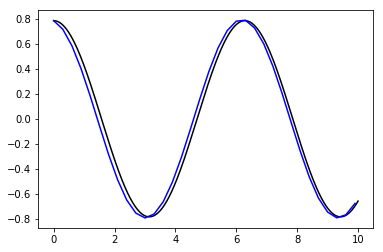

In [57]:
plt.plot(t_range,y_exact,'k');
plt.plot(t_range_rk2,y_rk2,'b');
plt.show();

In [58]:
# RK-4
dt_rk4 = 0.3
t_range_rk4 = np.arange(tlo,thi,dt_rk4)

npts_rk4 = len(t_range_rk4)
dy_rk4 = np.zeros((npts_rk4,1))
y_rk4 = np.zeros((npts_rk4,1))

dy_rk4[0] = 0; # initial value
y_rk4[0] = np.pi/4; # initial value

def gun1(t,y,dy):
    # Second order ODE, reformulated, returning only d(dy)/dt's values
    func = -y;
    return func

def fun1(t,y,dy):
    # Second order ODE, reformulated, returning only d(y)/dt's values
    func = dy;
    return func

for i in range(npts_rk4-1):
    k1 = dt_rk4*(fun1(t_range[i],y_rk4[i],dy_rk4[i]))
    l1 = dt_rk4*(gun1(t_range[i],y_rk4[i],dy_rk4[i]))
    k2 = dt_rk4*(fun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k1,dy_rk4[i]+0.5*l1))
    l2 = dt_rk4*(gun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k1,dy_rk4[i]+0.5*l1))
    k3 = dt_rk4*(fun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k2,dy_rk4[i]+0.5*l2))
    l3 = dt_rk4*(gun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k2,dy_rk4[i]+0.5*l2))
    k4 = dt_rk4*(fun1(t_range[i]+dt_rk4,y_rk4[i]+k3,dy_rk4[i]+l3))
    l4 = dt_rk4*(gun1(t_range[i]+dt_rk4,y_rk4[i]+k3,dy_rk4[i]+l3))
    
    y_rk4[i+1] = y_rk4[i] + (1/6)*(k1+2*k2+2*k3+k4)
    dy_rk4[i+1] = dy_rk4[i] + (1/6)*(l1+2*l2+2*l3+l4)

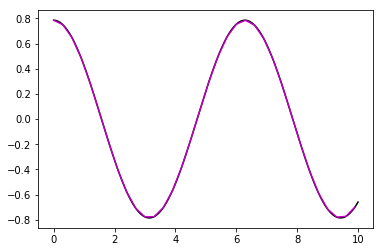

In [59]:
plt.plot(t_range,y_exact,'k');
plt.plot(t_range_rk4,y_rk4,'m');
plt.show();

We could change the timestep to maximum one that the scheme is stable for, but accuracy does down.

## Question 3

Pendulum (Large Amplitudes)

### Solution

Considering a massless string of length $\ell$ and a ball of mass $m$, from Newton's second law for rotation ($I$ is moment of inertia and $\alpha$ is the angular acceleration, we get:
$$
-mg \sin \theta \ell = m \ell^2 \frac{d^2 \theta}{d t^2}
$$

Therefore, the differential equation to be solved:
$$
\frac{d^{2} \theta}{d t^{2}}+\frac{g}{\ell} \sin\theta=0
$$
Since it's a second order ODE, we need to first convert it to a set of first order ODE. This is done by making the substitution $\frac{d \theta}{d t} = y$. Now, the equations become:
$$
\frac{d \theta}{d t} =  y \\
\frac{d y}{d t} = -\frac{g}{\ell} \sin\theta
$$

Given $g=\ell$, and initial values of $\theta_0 = \frac{\pi}{4}$ and $\frac{d \theta}{d t}|_{t=0} = 0$, we can now solve these using different time-marching schemes. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt;
from scipy.optimize import fsolve;

# define the function
# set up the time steps and other variables
tlo = 0
thi = 10

# Just for plotting
t_range = np.arange(tlo,thi,0.001)
y_exact = np.cos(t_range)*np.pi/4

def fun2(t,y):
    # Second order ODE, reformulated, returning only dy's values
    func = -np.sin(y);
    return func

In [19]:
# Euler Explicit
dt_ee = 0.3
t_range_ee = np.arange(tlo,thi,dt_ee)

npts_ee = len(t_range_ee)
dy_ee = np.zeros((npts_ee,1))
y_ee = np.zeros((npts_ee,1))

dy_ee[0] = 0; # initial value
y_ee[0] = np.pi/4; # initial value

for i in range(npts_ee-1):
    dy_ee[i+1] = dy_ee[i] + dt_ee*fun2(t_range_ee[i],y_ee[i])
    y_ee[i+1] = y_ee[i] + dt_ee*dy_ee[i+1]

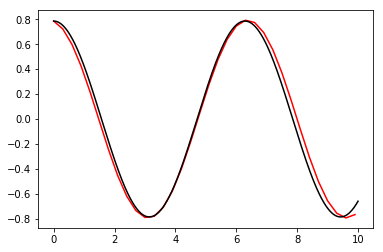

In [20]:
plt.plot(t_range_ee,y_ee,'r');
plt.plot(t_range,y_exact,'k');
plt.show();

In [60]:
# Euler Implicit

dt_ei = 0.3
t_range_ei = np.arange(tlo,thi,dt_ei)

npts_ei = len(t_range_ei)
dy_ei = np.zeros((npts_ei,1))
y_ei = np.zeros((npts_ei,1))

dy_ei[0] = 0; # initial value
y_ei[0] = np.pi/4; # initial value


# here, we have a non-linear equation which can be solved using fsolve and with an initial guess

for i in range(npts_ei-1):
    def nlfun(x):
        return dy_ei[i]+dt_ei*(-1)*np.sin(y_ei[i]+dt_ei*x)-x
    
    dy_ei[i+1] = fsolve(nlfun,dy_ei[i])
    y_ei[i+1] = y_ei[i] + dt_ei*dy_ei[i+1]

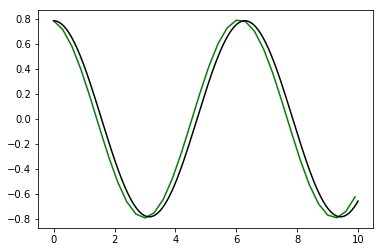

In [61]:
plt.plot(t_range_ei,y_ee,'g');
plt.plot(t_range,y_exact,'k');
plt.show();

In [64]:
# Trapezoidal
dt_tr = 0.3
t_range_tr = np.arange(tlo,thi,dt_tr)

npts_tr = len(t_range_tr)
dy_tr = np.zeros((npts_tr,1))
y_tr = np.zeros((npts_tr,1))

dy_tr[0] = 0; # initial value
y_tr[0] = np.pi/4; # initial value

for i in range(npts_tr-1):
    # we can directly using values computed above
    # dy_tr[i+1] = (dy_tr[i]*(1-0.25*dt_tr**2) + dt_tr*fun2(t_range_tr[i],y_tr[i]))/(1+0.25*dt_tr**2)
    y_tr[i+1] = 0.5*(y_ee[i+1] + y_ei[i+1]) 

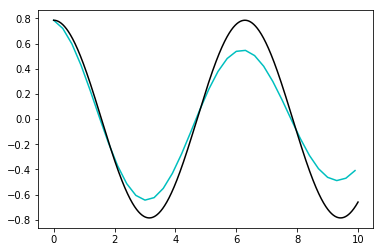

In [65]:
plt.plot(t_range_tr,y_tr,'c');
plt.plot(t_range,y_exact,'k');
plt.show();

In [66]:
# RK-2
dt_rk2 = 0.3
t_range_rk2 = np.arange(tlo,thi,dt_rk2)

npts_rk2 = len(t_range_rk2)
dy_rk2 = np.zeros((npts_rk2,1))
y_rk2 = np.zeros((npts_rk2,1))

dy_rk2[0] = 0; # initial value
y_rk2[0] = np.pi/4; # initial value

for i in range(npts_rk2-1):
    k1 = dt_rk2*fun2(t_range_rk2[i],y_rk2[i])
    k2 = dt_rk2*fun2(t_range_rk2[i]+dt_rk2,y_rk2[i]+k1)
    dy_rk2[i+1] = dy_rk2[i] + 0.5*k1 + 0.5*k2
    
    k1 = dt_rk2*dy_rk2[i+1]
    k2 = dt_rk2*(dy_rk2[i+1]+k1)
    y_rk2[i+1] = y_rk2[i] + 0.5*k1 + 0.5*k2

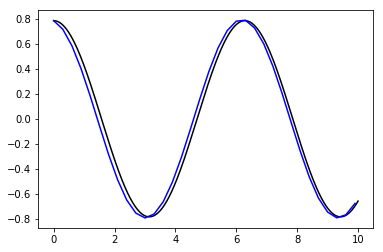

In [67]:
plt.plot(t_range,y_exact,'k');
plt.plot(t_range_rk2,y_rk2,'b');
plt.show();

In [68]:
# RK-4
dt_rk4 = 0.3
t_range_rk4 = np.arange(tlo,thi,dt_rk4)

npts_rk4 = len(t_range_rk4)
dy_rk4 = np.zeros((npts_rk4,1))
y_rk4 = np.zeros((npts_rk4,1))

dy_rk4[0] = 0; # initial value
y_rk4[0] = np.pi/4; # initial value

def gun1(t,y,dy):
    # Second order ODE, reformulated, returning only d(dy)/dt's values
    func = -np.sin(y);
    return func

def fun1(t,y,dy):
    # Second order ODE, reformulated, returning only d(y)/dt's values
    func = dy;
    return func

for i in range(npts_rk4-1):
    k1 = dt_rk4*(fun1(t_range[i],y_rk4[i],dy_rk4[i]))
    l1 = dt_rk4*(gun1(t_range[i],y_rk4[i],dy_rk4[i]))
    k2 = dt_rk4*(fun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k1,dy_rk4[i]+0.5*l1))
    l2 = dt_rk4*(gun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k1,dy_rk4[i]+0.5*l1))
    k3 = dt_rk4*(fun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k2,dy_rk4[i]+0.5*l2))
    l3 = dt_rk4*(gun1(t_range[i]+0.5*dt_rk4,y_rk4[i]+0.5*k2,dy_rk4[i]+0.5*l2))
    k4 = dt_rk4*(fun1(t_range[i]+dt_rk4,y_rk4[i]+k3,dy_rk4[i]+l3))
    l4 = dt_rk4*(gun1(t_range[i]+dt_rk4,y_rk4[i]+k3,dy_rk4[i]+l3))
    
    y_rk4[i+1] = y_rk4[i] + (1/6)*(k1+2*k2+2*k3+k4)
    dy_rk4[i+1] = dy_rk4[i] + (1/6)*(l1+2*l2+2*l3+l4)

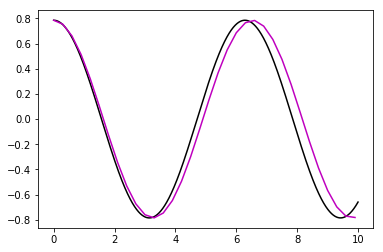

In [69]:
plt.plot(t_range,y_exact,'k');
plt.plot(t_range_rk4,y_rk4,'m');
plt.show();

Since the initial value of amplitude is large, the non-linear equation is more representative of the real scenario. The non-linear method has a larger time period as is evident from all the graphs above where the linear solution is plotted in black.

The stability regions have been determined using linear stability analysis. Therefore, they are not valid for non-linear equations.